In [2]:
# db 접속 
# 우선 db 접속 후 원시 데이터 받기
import pandas as pd
from sqlalchemy import create_engine
from config import DB_PASS

# PostgreSQL 데이터베이스 연결 설정
username = 'psh0826'  # 사용자 이름
password = DB_PASS  # 비밀번호
host = 'localhost'  # 데이터베이스 서버 주소
port = '5432'  # 포트 번호
dbname = 'youtube_videos'  # 데이터베이스 이름
connection_string = f"postgresql://{username}:{password}@{host}:{port}/{dbname}"

# 데이터베이스 연결 엔진 생성
engine = create_engine(connection_string)

# SQL 쿼리 실행 및 데이터프레임으로 변환
query = "SELECT * FROM video_datas;"

# 데이터를 가져올 테이블명
df = pd.read_sql(query, engine)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2391 entries, 0 to 2390
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   video_id      2391 non-null   object        
 1   title         2391 non-null   object        
 2   time          2391 non-null   datetime64[ns]
 3   views         2391 non-null   int64         
 4   likes         2391 non-null   int64         
 5   dislikes      2391 non-null   int64         
 6   comments_cnt  2391 non-null   int64         
 7   comments      2391 non-null   object        
 8   query         2391 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 168.2+ KB
None


In [19]:
df.describe()

,time,views,likes,dislikes,comments_cnt
count,2391,2.391000e+03,2391.000000,2391.0,2391.000000
mean,2023-02-25 17:35:32.851108352,1.504341e+05,1924.440402,0.0,88.563363
min,2022-09-01 02:00:07,5.130000e+02,0.000000,0.0,0.000000
25%,2022-10-10 05:07:35.500000,1.736850e+04,218.000000,0.0,11.000000
50%,2022-11-14 13:00:17,4.521600e+04,576.000000,0.0,44.000000
75%,2023-09-21 10:41:35,1.155560e+05,1461.500000,0.0,103.000000
max,2023-10-31 23:00:28,2.669352e+07,238817.000000,0.0,3942.000000
std,NaN,6.705289e+05,7521.767770,0.0,172.372061


In [27]:
df.columns

Index(['video_id', 'title', 'time', 'views', 'likes', 'dislikes',
       'comments_cnt', 'comments', 'query'],
      dtype='object')

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

# 데이터프레임을 로드하거나 생성합니다.
import pandas as pd


# # 데이터프레임을 프로파일링하고 보고서를 생성합니다.
# report = sv.analyze(df)
# # 보고서를 시각화합니다.
# report.show_html("output_report.html")


Feature: query                               |█████████ | [ 90%]   00:00 -> (00:00 left)/opt/homebrew/Caskroom/miniforge/base/envs/tensor/lib/python3.9/site-packages/sweetviz/graph.py:33: UserWarning: Glyph 54056 (\N{HANGUL SYLLABLE PAE}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
/opt/homebrew/Caskroom/miniforge/base/envs/tensor/lib/python3.9/site-packages/sweetviz/graph.py:33: UserWarning: Glyph 49496 (\N{HANGUL SYLLABLE SYEON}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
/opt/homebrew/Caskroom/miniforge/base/envs/tensor/lib/python3.9/site-packages/sweetviz/graph.py:33: UserWarning: Glyph 54056 (\N{HANGUL SYLLABLE PAE}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
/opt/homebrew/Caskroom/miniforge/base/envs/tensor/lib/python3.9/site-packages/sweetviz/graph.py:33: UserWarning: Glyph 49496 (\N{HANGUL SYLLABLE SYEON}) missing from current font.
  figur

Report output_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


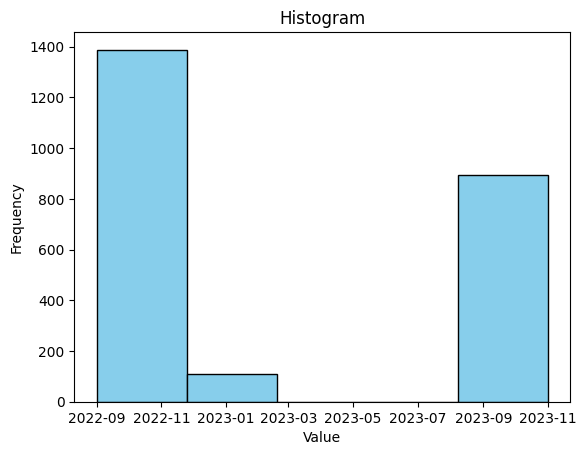

In [23]:
# 데이터 예시 (data는 데이터프레임의 특정 컬럼일 수 있음)
# data = [10, 20, 30, 40, 50, 50, 50, 60, 60, 70, 80]

# 히스토그램 생성
plt.hist(df['time'], bins=5, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

In [18]:
# 널값 확인
df.isnull()

# 널값 개수 확인
df.isnull().sum()
df.isna().sum()

# isna 는 시리얼 객체에도 적용됨.
df['video_id'].isna()
df['video_id'].isna().sum()




0